# <b>Midterm Report</b>

## Introduction/Background:
----------------------------------
With basketball being a popular pastime in the United States, fans spend much time on  supplementary activities such as betting. Sports betting allows fans to engage at a deeper level - leading them to wager money and track stats, storylines, and performances at a game-by-game level. 

The team plans to explore applications of machine learning to sports betting as it relates to the NBA season. Similar efforts in the past have successfully combined machine learning concepts such as convolutional neural networks with modern portfolio theory to maximize predictive power,  as well as expected profit on NBA betting (Hubáček, 2019). Other examples in sports such as tennis have seen the use of ensemble methods incorporating models such as logistic regression, neural networks, random forests, GBM, and SVM maximize expected return (Wilkens, 2021).

The dataset that we will use consists of data from each of the regular and postseason NBA games from the 2007-2008 to the 2021-2022 seasons (Skompinski, 2021). For each game, there are several attributes (100+) involving statistics for each of the teams playing, in addition to some betting data. 

## Problem Definition:
----------------------------------
One of the most common forms of sports betting is on the winner of a given matchup. Their simplicity and frequency drives popularity among bettors. Therefore, we considered analyzing winners of individual matches throughout the season.

While predicting regular season wins would be a useful tool, we find it more compelling to make forecasts on the winners of playoff matchups, based on regular season data. Teams are often criticized for being “regular season” performers - lacking an “intangible” gear to go into when the heightened postseason atmosphere materializes. More attention and prominence is associated with betting in the playoffs, and oftentimes greater payouts - further solidifying the exercise as a worthwhile one. 

## Methods:
----------------------------------
Using our aforementioned NBA game data, we plan on using multiple methods in order to build our predictive model. Namely, we will create a <font color = '419CFF'>convolutional neural network</font> and use a brute force strategy in order to analyze statistics from previous matches and generate a prediction. Additionally, we want to approach the <font color = '419CFF'>data with PCA (Preprocessing Analysis)</font> in order to find metrics for optimal predicted value for game winners. We may also experiment with player datasets in order to refine the model

In [27]:
# imports
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition, metrics
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, roc_auc_score

In [17]:
# Load the data that NBA games from the 2007-2008 to 2021-2022 seasons
df = pd.read_csv('DatasetFinal.csv')
df

,Unnamed: 0.1,Unnamed: 0,Post-Season,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,Date,TEAM_NAME.1,GP.1,W.1,L.1,W_PCT.1,MIN.1,FGM.1,FGA.1,FG_PCT.1,FG3M.1,FG3A.1,FG3_PCT.1,FTM.1,FTA.1,FT_PCT.1,OREB.1,DREB.1,REB.1,AST.1,TOV.1,STL.1,BLK.1,BLKA.1,PF.1,PFD.1,PTS.1,PLUS_MINUS.1,GP_RANK.1,W_RANK.1,L_RANK.1,W_PCT_RANK.1,MIN_RANK.1,FGM_RANK.1,FGA_RANK.1,FG_PCT_RANK.1,FG3M_RANK.1,FG3A_RANK.1,FG3_PCT_RANK.1,FTM_RANK.1,FTA_RANK.1,FT_PCT_RANK.1,OREB_RANK.1,DREB_RANK.1,REB_RANK.1,AST_RANK.1,TOV_RANK.1,STL_RANK.1,BLK_RANK.1,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1,Date.1,Score,Home-Team-Win,OU,OU-Cover
0,0,0,0,Philadelphia 76ers,2,1,1,0.500,48.0,36.5,82.5,0.442,4.0,14.0,0.286,19.5,28.5,0.684,16.5,34.0,50.5,20.0,19.0,6.0,8.0,5.5,19.5,21.5,96.5,1.0,2,8,12,12,5,18,14,18,26,26,26,14,13,21,3,12,5,18,26,19,4,12,7,20,20,15,2007-11-03,New Jersey Nets,2,1,1,0.500,50.5,29.0,75.0,0.387,7.5,22.0,0.341,25.0,29.5,0.847,11.0,30.0,41.0,21.5,18.0,6.5,6.5,4.0,26.5,24.5,90.5,-14.0,2,8,12,12,1,30,28,29,9,7,17,4,12,3,13,20,20,10,23,17,7,7,24,9,28,27,2007-11-03,181,0,186.5,0
1,1,1,0,Washington Wizards,2,0,2,0.000,50.5,32.0,89.5,0.358,3.0,18.0,0.167,29.5,40.0,0.738,18.5,32.0,50.5,13.0,19.0,6.0,5.5,6.0,26.5,28.5,96.5,-14.5,2,20,23,20,1,28,4,30,29,16,30,2,2,14,1,16,5,30,26,19,15,13,24,2,20,28,2007-11-03,Orlando Magic,2,1,1,0.500,48.0,31.5,75.0,0.420,10.0,20.0,0.500,24.0,34.0,0.706,9.5,28.5,38.0,15.5,11.0,3.5,5.5,6.0,21.0,25.5,97.0,-2.5,2,8,12,12,5,29,28,21,3,13,3,7,5,19,21,23,25,28,1,29,15,13,10,6,19,16,2007-11-03,176,0,199.0,0
2,2,2,0,Memphis Grizzlies,1,0,1,0.000,48.0,38.0,80.0,0.475,10.0,23.0,0.435,15.0,20.0,0.750,6.0,36.0,42.0,21.0,14.0,5.0,6.0,5.0,19.0,17.0,101.0,-3.0,24,20,12,20,5,11,20,9,3,5,10,21,23,12,29,7,18,11,8,25,10,9,5,28,15,17,2007-11-03,Indiana Pacers,2,2,0,1.000,50.5,35.5,87.5,0.406,10.0,22.0,0.455,22.0,28.5,0.772,13.5,39.5,53.0,21.0,15.5,10.5,9.5,7.5,25.5,22.5,103.0,5.5,2,2,1,1,1,21,6,25,3,7,8,10,13,8,11,1,1,11,15,4,1,22,22,15,10,11,2007-11-03,232,0,211.5,1
3,3,3,0,Milwaukee Bucks,2,0,2,0.000,48.0,37.5,87.0,0.431,4.5,15.0,0.300,11.5,18.0,0.639,16.0,30.0,46.0,18.0,17.0,5.5,6.0,8.0,30.0,22.5,91.0,-11.0,2,20,23,20,5,14,7,20,25,21,24,28,27,27,4,20,10,26,20,23,10,24,30,15,26,24,2007-11-03,Chicago Bulls,2,0,2,0.000,50.5,35.5,91.0,0.390,7.5,23.5,0.319,15.5,22.5,0.689,15.5,25.0,40.5,20.5,16.0,9.0,5.0,7.0,26.5,26.5,94.0,-10.0,2,20,23,20,1,21,2,28,9,4,21,20,19,20,5,29,22,16,16,9,19,20,24,4,23,23,2007-11-03,150,1,193.5,0
4,4,4,0,Houston Rockets,2,2,0,1.000,48.0,36.5,77.0,0.474,5.5,19.0,0.289,22.0,30.5,0.721,10.5,34.5,45.0,21.0,16.5,9.5,6.5,3.5,27.0,24.5,100.5,6.5,2,2,1,1,5,18,25,10,23,14,25,10,10,17,17,9,13,11,18,7,7,5,28,9,18,9,2007-11-03,Portland Trail Blazers,2,0,2,0.000,48.0,39.5,80.5,0.491,6.0,13.0,0.462,10.0,13.5,0.741,8.5,26.5,35.0,19.0,15.0,2.5,2.5,3.5,18.5,19.5,95.0,-14.5,2,20,23,20,5,7,18,4,20,27,6,29,30,13,25,28,29,23,10,30,29,5,2,22,22,28,2007-11-03,169,1,203.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18838,18838,18838,1,Golden State Warriors,82,53,29,0.646,48.1,40.5,86.4,0.469,14.3,39.4,0.364,15.6,20.3,0.769,9.8,35.7,45.5,27.1,14.9,8.8,4.5,3.9,21.0,18.0,111.0,5.5,1,3,3,3,24,17,21,10,3,3,8,26,26,17,20,2,7,5,29,4,18,2,27,29,15,5,2022-06-06,Boston Celtics,82,51,31,0.622,48.5,40.7

### Data cleaning

In order to clean our data, we made several modifications. As the table includes game data from the 2007-2008 to the 2021-2022 NBA season across both regular season and playoff matchups, there are nearly 20,000 rows including over 100 fields. Save for the last four columns, most fields appear in duplicate - this is because they are shown for both teams (e.g., GP - Games Played, FGM - Field Goals Made, REB - Rebounds, etc.). 

In order to distinguish between fields corresponding to the home team versus the away team, we concatenate a “.1” to the last 54 fields to designate the away team. While our dataset is relatively robust, we did see an opportunity to introduce some labels: namely, a binary “playoff” field.. However, the distinction between playoff and regular season games is not made clear in the data, so we introduced this column to the dataset. Additionally, we find it potentially valuable to add win/loss streak field(s) to demonstrate the effect of momentum on a team’s success. We have not yet implemented this attribute, but plan to for the final iteration.

We also removed the first column (index) from the dataset, as it is made redundant by the default indexing of the pandas dataframe we work with. Furthermore, we removed the Date column - the reasons for this are twofold. One, the date column intuitively should have little impact on the winner of a game, as the effect of progression through the season (e.g., fatigue, push for playoff seeding, tanking) should be captured by Games Played and Win/Loss and two, is formatted such that it would be difficult to work with and incorporate into our Principal Component Analysis. Before executing the PCA, however, we needed to encode two categorical variables (Team_Name and Team_Name.1), instead denoting each team with an integer value from 1-30. 

In [18]:
df.columns
df.drop(columns=df.columns[0:2],inplace=True)

# exclude dates
df = df.drop(columns=['Date.1', 'Date'])

# encoding the team names
enc = preprocessing.LabelEncoder()
df[['TEAM_NAME', 'TEAM_NAME.1']] = df[['TEAM_NAME', 'TEAM_NAME.1']].apply(enc.fit_transform)
df

In order to set up the PCA, we needed to further preprocess our data. To do so, we <font color = FFB141>standardized the data outside of the encoded team name</font> using the scikit-learn StandardScaler() method, which calculates a z-score to normalize each value. 

In [22]:
# standardize the data
scaler = preprocessing.StandardScaler()
df.loc[:, ~df.columns.isin(['TEAM_NAME', 'TEAM_NAME.1', 'Home-Team-Win'])] = scaler.fit_transform(df.loc[:, ~df.columns.isin(['TEAM_NAME', 'TEAM_NAME.1', 'Home-Team-Win'])])
pd.set_option('display.max_columns', None)
df

,Post-Season,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,TEAM_NAME.1,GP.1,W.1,L.1,W_PCT.1,MIN.1,FGM.1,FGA.1,FG_PCT.1,FG3M.1,FG3A.1,FG3_PCT.1,FTM.1,FTA.1,FT_PCT.1,OREB.1,DREB.1,REB.1,AST.1,TOV.1,STL.1,BLK.1,BLKA.1,PF.1,PFD.1,PTS.1,PLUS_MINUS.1,GP_RANK.1,W_RANK.1,L_RANK.1,W_PCT_RANK.1,MIN_RANK.1,FGM_RANK.1,FGA_RANK.1,FG_PCT_RANK.1,FG3M_RANK.1,FG3A_RANK.1,FG3_PCT_RANK.1,FTM_RANK.1,FTA_RANK.1,FT_PCT_RANK.1,OREB_RANK.1,DREB_RANK.1,REB_RANK.1,AST_RANK.1,TOV_RANK.1,STL_RANK.1,BLK_RANK.1,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1,Score,Home-Team-Win,OU,OU-Cover
0,-0.237112,26,-1.684315,-1.368008,-1.466677,-0.046255,-1.011219,-0.707016,-0.407518,-0.621131,-1.672326,-1.394144,-2.349628,0.709227,1.694739,-2.152713,3.942970,0.567243,2.841209,-0.920818,3.053921,-1.523315,3.192008,0.619164,-0.658358,0.447442,-0.929743,0.136055,-1.141731,-0.719371,-0.212995,-0.294941,-1.039994,0.307790,-0.189680,0.324150,1.238278,1.232355,1.240836,-0.157160,-0.278001,0.652995,-1.447565,-0.370527,-1.191321,0.303751,1.234957,0.425502,-1.298927,-0.363763,-0.972015,0.535330,0.549366,0.002502,20,-1.687317,-1.381122,-1.466342,-0.062977,6.536296,-3.771622,-2.234797,-3.414652,-0.434619,-0.332550,-0.472658,3.044221,2.011384,2.359817,0.225730,-1.049705,-0.889509,-0.325115,2.375883,-1.074764,1.634716,-1.040274,3.201855,2.145343,-1.793124,-2.635598,-1.134387,-0.705627,-0.205234,-0.283420,-1.527669,1.700067,1.433319,1.598699,-0.718621,-0.962606,0.211085,-1.315939,-0.393304,-1.428171,-0.290859,0.563352,0.549649,-0.603831,0.887215,0.191459,-0.949909,-0.929686,1.001551,-0.736910,1.481850,1.398772,-1.154642,0,-0.937742,-0.980049
1,-0.237112,34,-1.684315,-1.432666,-1.391912,-2.758043,6.490512,-2.532929,1.278868,-4.872798,-2.026456,-0.863886,-6.426255,4.981527,5.535196,-0.664518,5.290768,-0.233890,2.841209,-3.745270,3.053921,-1.523315,0.560961,1.171527,3.166770,4.446446,-0.929743,-2.702999,-1.141731,0.666844,1.052828,0.621091,-1.528895,1.461772,-1.339362,1.705861,1.583708,0.077321,1.701155,-1.543243,-1.544951,-0.154675,-1.677739,0.089100,-1.191321,1.679915,1.234957,0.425502,-0.034076,-0.248835,0.991031,-1.546490,0.549366,1.493426,25,-1.687317,-1.381122,-1.466342,-0.062977,-1.021857,-2.754641,-2.234797,-1.744681,0.454109,-0.598678,4.948056,2.618718,3.503699,-1.558520,-0.780603,-1.653157,-2.064819,-2.758332,-2.521764,-3.846852,0.564846,1.205498,0.174232,2.713104,-0.868588,-0.522177,-1.134387,-0.705627,-0.205234,-0.283420,-1.037618,1.584905,1.433319,0.679182,-1.409793,-0.271247,-1.406621,-0.969085,-1.200365,0.418330,0.629332,0.909407,1.126565,1.465104,-1.658707,1.572071,-0.026738,-0.237605,-0.616111,-1.084122,0.442852,0.132115,-1.376722,0,-0.359796,-0.980049
2,-0.237112,16,-1.725624,-1.432666,-1.466677,-2.758043,-1.011219,-0.098379,-1.009799,1.049166,0.452448,-0.201062,2.754719,-1.213308,-1.143860,-0.333808,-3.132971,1.368377,-0.481454,-0.517325,-0.424970,-2.438365,1.087170,0.066801,-0.931581,-2.123346,-0.290332,-0.596604,1.337486,0.666844,-0.212995,0.621091,-1.039994,-0.499998,0.500130,-0.712132,-1.410018,-1.193216,-0.600438,0.651389,0.873771,-0.385437,1.544701,-0.945061,0.307022,-0.499011,-0.850527,1.115723,-0.609008,-0.708545,-1.202962,1.460584,-0.027929,0.231874,12,-1.687317,-1.316067,-1.541316,2.672370,6.536296,-1.127471,0.795803,-2.453154,0.454109,-0.332550,3.413892,1.767712,1.679758,0.275596,1.902951,2.772158,3.811730,-0.527883,0.626723,2.621355,4.844328,2.889828,2.651378,1.009821,-0.015169,0.948030,-1.134387,-1.400286,-1.475335,-1.545970,-1.527669,0.663610,-1.107667,1.138941,-1.409793,-0.962606,-0.828869,-0.622231,-0.278009,-0.851140,-0.520907,-1.628331,-1.642633,-0.488890,-0.038575,-1.304205,-1.642288,0.800517,0.770456

### Pre-Processing

To conduct PCA, we drop five columns (Team_Name, Team_Name.1, Score, Home-Team-Win, and OU-Cover). We set our variance threshold to 95%, and using scikit-learn’s PCA object, we fit_transform our dataset to 39 principal components. Next, a boolean variable do_PCA is set to decide if we want to include PCA components or our raw components in model training. This is useful for comparing model performance between with and without PCA.

In [ ]:
# PCA but exclude the categorical team 
df_PCA = df.drop(columns=['TEAM_NAME', 'TEAM_NAME.1', 'Score', 'OU-Cover', 'Home-Team-Win'])
pca = decomposition.PCA(n_components=0.95)
df_PCA_transformed = pca.fit_transform(df_PCA)
print(f'Below is an array of the new components sorted by decreasing explained variance:')
print(pca.explained_variance_ratio_)
print(f'New # of features is: {len(pca.explained_variance_ratio_)}')
print(df_PCA_transformed.shape[1])

In [ ]:
do_PCA = False

if do_PCA:
    arr = np.array(df_PCA_transformed)
    labels = np.array(df['Home-Team-Win']).reshape((-1, 1))
    arr = np.hstack((arr, labels))
else:
    arr = np.array(df_PCA)
    labels = np.array(df['Home-Team-Win']).reshape((-1, 1))
    arr = np.hstack((arr, labels))
# labels added to the end
arr[:5, -5:]

Before running our feedforward / basic neural network, we first split our data into training and test sections, randomized on the basis of date - using a 90/10 split. We also remove the dependent label: the “Home-Team Win” field into a new array to simplify our code. 

In [ ]:
# randomize data based on dates
rand = arr.copy()
np.random.shuffle(rand)
rand

### Model Design

In designing our feedforward neural net, we made several design choices. First, we tested between 2-4 layers of tensorflow’s Dense neurons to see how model performance changed. X layers was the optimal number. Based on online research and performance, a rectified linear unit (relu) activation function appeared to be optimal for initial and intermediary layers, while the output neuron is one with a sigmoid activation function for binary classification.

In [11]:
# remove y label (home team winning)
y = rand[:, -1]
x = np.delete(rand, -1, axis=1)

# take a % of data for training
percent = 0.90
length = len(rand)
x_train = x[:int(percent * length), :]
y_train = y[:int(percent * length)]
x_test = x[int(percent * length):, :]
y_test = y[int(percent * length):]

In [12]:
x_train.shape

(16958, 106)

In [13]:
# basic neural net to see if it works
model = models.Sequential([
    layers.Dense(units=100, activation='relu', input_shape=(x_train.shape[1], )),
    layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10700     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
losses_data = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=40)


530/530 [==============================] - 2s 3ms/step - loss: 0.4067 - acc: 0.8133 - val_loss: 0.8580 - val_acc: 0.6159
Epoch 39/40
530/530 [==============================] - 1s 2ms/step - loss: 0.4033 - acc: 0.8146 - val_loss: 0.8557 - val_acc: 0.6345
Epoch 40/40
530/530 [==============================] - 1s 2ms/step - loss: 0.4032 - acc: 0.8128 - val_loss: 0.8767 - val_acc: 0.5989


We run the model with the Adam optimizer and the MSE loss function.  Below  are displayed the loss functions. The loss is the loss of our model on training data, while the val_loss is the loss during cross_validation on testing data.

<AxesSubplot:>

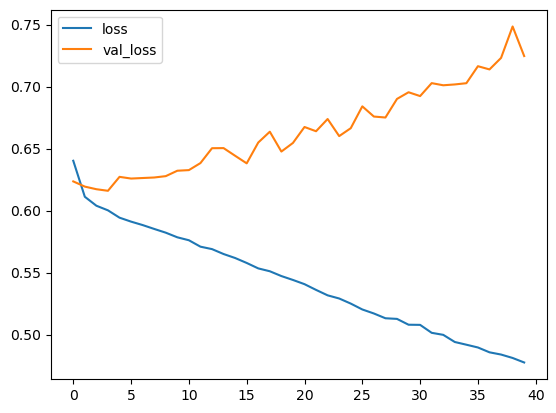

In [15]:
loss = pd.DataFrame(losses_data.history)
loss
loss.loc[:, ['loss', 'val_loss']].plot()

We also see the accuracy score, or the percentage of correctly predicted winners over all games in the dataset. This value of 0.63 suggests the model is relatively adept at correctly classifying winners. 


We can also view the Mean Squared Error (MSE) in this regression context, allowing us to see the average of the squared difference between the predicted and actual outcomes. In this case, the predicted outcome can be the probability of the home team winning the game. The MSE value of 0.37 shows the model is effective at reducing error. 


Below we see the Area Under the Receiver Operating Characteristic Curve (AUC-ROC), commonly used for binary classification problems to measure the performance of the neural network in terms of the trade-off between true positive rate and false positive rate. In this case, the predicted outcome can be the probability of the home team winning the game. Since the AUC value of the ROC curve is relatively close to 1 (.64), the model is a good classifier. 


59/59 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[402 361]
 [395 727]]
F1 Score: 0.66
Accuracy: 0.60
MSE: 0.40
AUC: 0.62


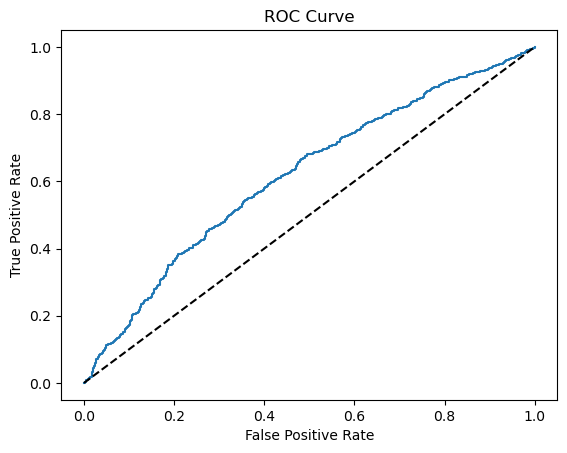

In [34]:
# Calculating F1 score
pred = model.predict(x_test)
binary_pred = (pred > 0.5).astype(np.float32)

conmat = metrics.confusion_matrix(y_test, binary_pred)
print("Confusion Matrix:\n", conmat)

# do accuracy, confusion matrix, F1 score

f1 = metrics.f1_score(y_test, binary_pred)
print("F1 Score: {:.2f}".format(f1))

acc = accuracy_score(y_test, binary_pred)

print("Accuracy: {:.2f}".format(acc))

mse = mean_squared_error(y_test, binary_pred)

print("MSE: {:.2f}".format(mse))

# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# calculate AUC
auc = roc_auc_score(y_test, pred)

print("AUC: {:.2f}".format(auc))

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()